In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [2]:
import pandas as pd

import gzip
import networkx as nx

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# Load the data 

In [4]:
file = open('/content/drive/MyDrive/CSE508_Winter2023_A3_98/p2p-Gnutella05.txt', 'r')
Lines = file.readlines()
Lines[3],Lines[4]

('# FromNodeId\tToNodeId\n', '0\t1\n')

# Extract list of edges and nodes from the .txt file

In [5]:
edges = []
all_nodes = []

for line in Lines[4:]:
    ele_list = line.strip().split()
    node_temp = [int(i) for i in ele_list]

    for node in node_temp:
      all_nodes.append(node)

    edges.append((node_temp[0],node_temp[1]))


In [6]:
print(edges[:5])
print(all_nodes[:5])

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
[0, 1, 0, 2, 0]


In [7]:
print('Total number of edges in the graph: ',len(edges))


Total number of edges in the graph:  31839


In [8]:
# Create set of unique nodes

nodes = set(all_nodes)
print('Toatl number of nodes in the graph: ',len(nodes))

Toatl number of nodes in the graph:  8846


# Create a diGraph object 

In [9]:
graph = nx.DiGraph()
for i in edges:
    graph.add_edge(i[0] , i[1])

In [10]:
# Printing number of ndes and edges using functions from nx library 

print('Number of nodes (using nx library): ', graph.number_of_nodes())
print('Number of edges (using nx library): ', graph.number_of_edges())

Number of nodes (using nx library):  8846
Number of edges (using nx library):  31839


# Calculate pagerank using nx library

In [11]:
page_ranks = nx.pagerank(graph)

In [30]:
# Printing the page rank score range

pr_min = min(page_ranks.values())
pr_max = max(page_ranks.values())

print('Page rank range: (',pr_min,'-',pr_max,')')

Page rank range: ( 6.989799880100975e-05 - 0.0010650431352832407 )


# Authority and Hub score for each node


In [13]:
hub_scores,authority_scores = nx.hits(graph)

In [14]:
# Printing the Hub score range

hs_min = min(hub_scores.values())
hs_max = max(hub_scores.values())

print('Hub score range: (',hs_min,'-',hs_max,')')

Page rank range: ( -1.9789912682262837e-20 - 0.0042977797555960795 )


In [15]:
# Printing the page rank score range

as_min = min(authority_scores.values())
as_max = max(authority_scores.values())

print('Authority score range: (',as_min,'-',as_max,')')

Page rank range: ( -9.122141878126134e-19 - 0.023124000691889458 )


# Combining all scores node wise

In [18]:
node_list = [i for i in range(graph.number_of_nodes())]
df_combined = {"node":node_list , "hubScore":[0]*len(node_list) , "pagerankScore":[0]*len(node_list) , "authorityScore":[0]* len(node_list) }
df_combined = pd.DataFrame(df_combined)

In [19]:
node_list = list(hub_scores.keys())
for i in node_list:
  df_combined['hubScore'][i] = hub_scores[i]
  df_combined['pagerankScore'][i] = authority_scores[i]
  df_combined['authorityScore'][i] = page_ranks[i]
  df_combined['node'][i] = i

# hub_scores, authority_scores, page_ranks
pd.DataFrame(df_combined)
df_combined.iloc[7:15]

,node,hubScore,pagerankScore,authorityScore
7,7,-0.000000,0.000086,0.000249
8,8,-0.000000,0.000003,0.000161
9,9,0.000013,0.000005,0.000139
10,10,0.000009,0.000027,0.000131
11,11,0.000008,0.000156,0.000218
12,12,0.000006,0.000001,0.000124
13,13,0.000004,0.000046,0.000158
14,14,0.000247,0.000043,0.000125


#  Compare the results obtained from both the algorithms in parts 1 and 2 based on the node scores

## Distribution of Page rank scores 

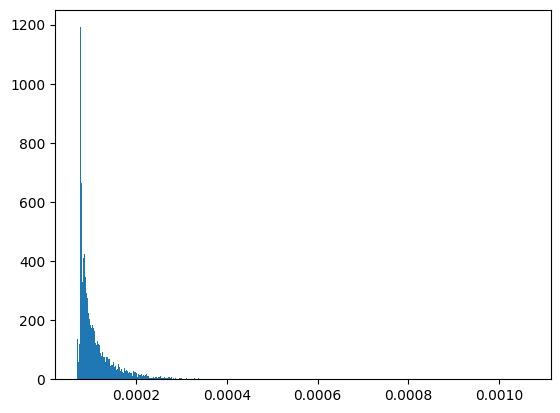

In [20]:
plt.hist(page_ranks.values(),bins=500)
plt.show()

## Distribution of Hub scores 

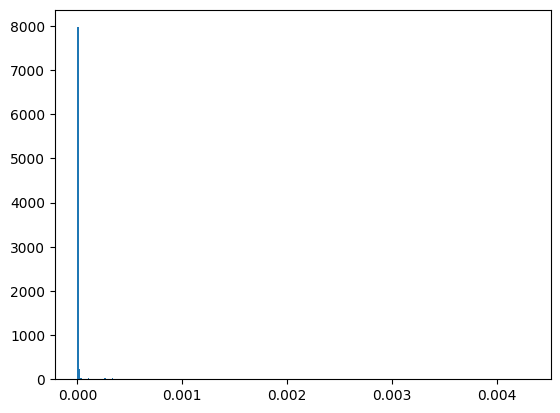

In [21]:
plt.hist(hub_scores.values(),bins=300)
plt.show()
# hub_scores,authority_scores

## Distribution of Authrity scores 

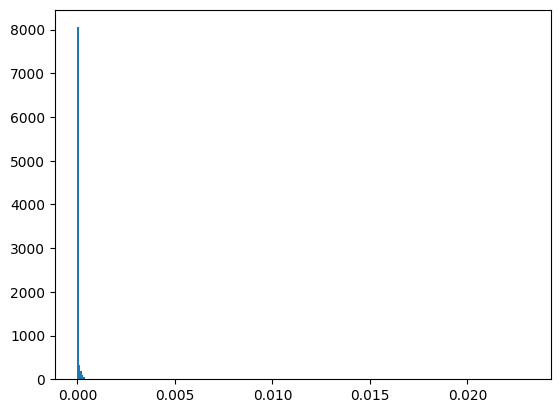

In [22]:
plt.hist(authority_scores.values(),bins=300)
plt.show()

## Comparring all three scores together

In [28]:
fig = px.line(df_combined, x='node', y=['hubScore' , 'authorityScore' , 'pagerankScore'] , title = "Hub , authority and pagerank Comparision")
fig.show()

In [29]:
# (df_combined, x='node', y=['hubScore' , 'authorityScore' , 'pagerankScore'] , title = "Hub , authority and pagerank Comparision")
fig = px.scatter(df_combined, x='node', y=['hubScore' , 'authorityScore' , 'pagerankScore'] , title = "Hub , authority and pagerank Comparision")
fig.show()

In [38]:
print('Page rank: ',page_ranks[121])
print('Hub score: ',hub_scores[12])
print('Authority score: ',authority_scores[121])

Page rank:  0.00011373781335447269
Hub score:  5.651450103107276e-06
Authority score:  2.1493047978181387e-05
